# <font color = 'green'>Purpose of this Notebook: to add additional features to the base GCSEs dataset, for use in modeling</font>

## Index

<a href='#nb_setup'>Notebook Set Up</a><br />
1)  <a href='#1'>Additional Features part 1, including class size and mean teacher salary</a><br />
2)  <a href='#2'>Additional Features part 2: School type (Selective vs non-Selective)</a><br />
3)  <a href='#3'>Additional Features part 3: Most recent Ofsted Rating</a><br />
4)  <a href='#4'>Remove academic features from the dataset</a><br />
5)  <a href='#5'>Rename feature / column names</a><br />
6)  <a href='#6'>Export final (base + new features) dataset ready for modeling</a><br />

<br />


# <font color='blue'>Notebook Set Up (import modules and data)</font>

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from pandas import read_csv
import csv


# base dataset
df_model = pd.read_csv('data_files/final_base_feat_gcse_2018.csv')

# additional datasets to be added
df_teacher = read_csv('data_files/england_swf.csv')
df_ofsted = read_csv('data_files/edubasealldata20190821.csv', low_memory=False, encoding='latin-1')

In [3]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 75 columns):
Unnamed: 0             3165 non-null int64
RECTYPE                3165 non-null int64
LEA                    3165 non-null float64
ESTAB                  3165 non-null float64
URN                    3165 non-null float64
SCHNAME                3165 non-null object
PCODE                  3165 non-null object
ICLOSE                 3165 non-null float64
NFTYPE                 3165 non-null object
RELDENOM               3165 non-null object
ADMPOL                 3165 non-null object
ADMPOL_2017            3165 non-null object
EGENDER                3165 non-null object
FEEDER                 3165 non-null float64
TABKS2                 3165 non-null float64
TAB1618                3165 non-null float64
TPUP                   3165 non-null float64
PBPUP                  3165 non-null float64
KS2APS                 3165 non-null float64
PTPRIORLO              3165 non-null float64
PTPR

In [4]:
df_model.head()

,Unnamed: 0,RECTYPE,LEA,ESTAB,URN,SCHNAME,PCODE,ICLOSE,NFTYPE,RELDENOM,...,PTEBACENG91,PTEBACMAT91,PT5EM_94,PT5EM_94_18,PTANYQ_PTQ_EE,PTmultiLan_E,PTtripleSci_E,TAVENT_E_3NG_PTQ_EE,TAVENT_G_PTQ_EE,P8_BANDING
0,0,1,202.0,4104.0,100049.0,Haverstock School,NW3 2BQ,0.0,CY,Does not apply,...,98.0,98.0,57.0,57.0,99.0,5.0,17.0,7.3,7.1,3.0
1,1,1,202.0,4166.0,100050.0,Parliament Hill School,NW5 1RL,0.0,CY,Does not apply,...,98.0,99.0,77.0,77.0,100.0,8.0,33.0,8.5,8.4,1.0
2,3,1,202.0,4196.0,100051.0,Regent High School,NW1 1RX,0.0,CY,Does not apply,...,95.0,94.0,42.0,42.0,99.0,2.0,20.0,7.8,7.2,4.0
3,4,1,202.0,4275.0,100052.0,Hampstead School,NW2 3RT,0.0,CY,Does not apply,...,97.0,96.0,51.0,51.0,98.0,9.0,22.0,9.2,8.4,3.0
4,5,1,202.0,4285.0,100053.0,Acland Burghley School,NW5 1UJ,0.0,CY,Does not apply,...,99.0,96.0,59.0,59.0,99.0,4.0,24.0,7.8,7.7,3.0


In [5]:
df_model = df_model.drop("Unnamed: 0", axis=1)

In [6]:
df_model['RECTYPE'].value_counts()

1    3165
Name: RECTYPE, dtype: int64

<a id='1'></a>

# <font color='blue'>1) Additional Features part 1, including class size and mean teacher salary</font>

### <font color='green'>a) Drop schools(rows) with Null values for the new features</font>

In [7]:
# examine data file containing Pupil/Teacher ratio and other data

df_teacher.head()

,LA Number,Establishment Number,URN,Total Number of Teachers (Headcount),Total Number of Teaching Assistants (Headcount),"Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff (Headcount)",Total Number of Teachers (Full-Time Equivalent),Total Number of Teaching Assistants (Full-time Equivalent),"Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff (Full-Time Equivalent)",Pupil: Teacher Ratio,Mean Gross FTE Salary of All Teachers (£s)
0,201,3614,100000.0,24,16,19,18.8,12.0,10.3,15.1,"£45,884"
1,202,2000,136807.0,8,6,3,6.8,3.8,2.6,15.4,"£46,368"
2,202,2001,139837.0,9,9,2,8.7,8.2,1.7,14.0,"£42,130"
3,202,2002,140686.0,10,17,3,10.0,14.2,2.6,20.1,"£42,484"
4,202,2019,100008.0,21,14,7,20.1,12.4,6.1,18.2,"£44,201"


In [8]:
# set up DataFrame of clean data

df_tp_ratio = df_teacher[['LA Number', 'Establishment Number', 'URN', 'Total Number of Teachers (Full-Time Equivalent)', 'Total Number of Teaching Assistants (Full-time Equivalent)', 'Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff (Full-Time Equivalent)', 'Pupil:     Teacher Ratio', 'Mean Gross FTE Salary of All Teachers (£s)']].copy()
df_tp_ratio.columns = ['LEA','ESTAB', 'URN', 'Teachers_FTE', 'TAs_FTE', 'Staff_non_classroom', 'Pupil_Teacher_ratio', 'Mean_Gross_FTE_Sal']
df_tp_ratio.head(10)

,LEA,ESTAB,URN,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,201,3614,100000.0,18.8,12.0,10.3,15.1,"£45,884"
1,202,2000,136807.0,6.8,3.8,2.6,15.4,"£46,368"
2,202,2001,139837.0,8.7,8.2,1.7,14.0,"£42,130"
3,202,2002,140686.0,10.0,14.2,2.6,20.1,"£42,484"
4,202,2019,100008.0,20.1,12.4,6.1,18.2,"£44,201"
5,202,2036,100009.0,25.4,16.3,3.0,17.3,"£46,111"
6,202,2065,100010.0,21.2,15.0,8.0,18.2,"£42,914"
7,202,2078,100011.0,19.4,14.0,6.5,21.7,"£41,728"
8,202,2095,100012.0,18.3,20.1,5.4,18.1,"£46,246"
9,202,2184,100013.0,13.7,11.2,4.0,14.6,"£44,582"


In [9]:
# Examine data on class size

df_tp_ratio['Pupil_Teacher_ratio'].value_counts()

20.9    235
21.0    235
22.0    229
21.6    228
21.3    224
       ... 
34.8      1
42.8      1
33.0      1
34.6      1
35.9      1
Name: Pupil_Teacher_ratio, Length: 347, dtype: int64

In [10]:
df_tp_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20186 entries, 0 to 20185
Data columns (total 8 columns):
LEA                    20186 non-null object
ESTAB                  20186 non-null object
URN                    20184 non-null float64
Teachers_FTE           20080 non-null object
TAs_FTE                20080 non-null object
Staff_non_classroom    20080 non-null object
Pupil_Teacher_ratio    20023 non-null object
Mean_Gross_FTE_Sal     20075 non-null object
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [11]:
# check that the Local Education Authorities (LEAs) are all represented - should be 153

len(df_tp_ratio['LEA'].unique())

153

In [12]:
# Sort LEA column

df_tp_ratio['LEA'] = df_tp_ratio[df_tp_ratio['LEA'] != 'NAT']
df_tp_ratio['LEA'] = df_tp_ratio['LEA'].astype(float)
df_tp_ratio.head()

,LEA,ESTAB,URN,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,201.0,3614,100000.0,18.8,12.0,10.3,15.1,"£45,884"
1,202.0,2000,136807.0,6.8,3.8,2.6,15.4,"£46,368"
2,202.0,2001,139837.0,8.7,8.2,1.7,14.0,"£42,130"
3,202.0,2002,140686.0,10.0,14.2,2.6,20.1,"£42,484"
4,202.0,2019,100008.0,20.1,12.4,6.1,18.2,"£44,201"


In [13]:
# sort Pupil_Teacher_ratio column

df_tp_ratio = df_tp_ratio[df_tp_ratio['Pupil_Teacher_ratio'] != 'SUPP']
df_tp_ratio['Pupil_Teacher_ratio'] = df_tp_ratio['Pupil_Teacher_ratio'].astype(float)
df_tp_ratio = df_tp_ratio.dropna()
df_tp_ratio.head()

,LEA,ESTAB,URN,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,201.0,3614,100000.0,18.8,12.0,10.3,15.1,"£45,884"
1,202.0,2000,136807.0,6.8,3.8,2.6,15.4,"£46,368"
2,202.0,2001,139837.0,8.7,8.2,1.7,14.0,"£42,130"
3,202.0,2002,140686.0,10.0,14.2,2.6,20.1,"£42,484"
4,202.0,2019,100008.0,20.1,12.4,6.1,18.2,"£44,201"


In [14]:
df_tp_ratio.head()

,LEA,ESTAB,URN,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,201.0,3614,100000.0,18.8,12.0,10.3,15.1,"£45,884"
1,202.0,2000,136807.0,6.8,3.8,2.6,15.4,"£46,368"
2,202.0,2001,139837.0,8.7,8.2,1.7,14.0,"£42,130"
3,202.0,2002,140686.0,10.0,14.2,2.6,20.1,"£42,484"
4,202.0,2019,100008.0,20.1,12.4,6.1,18.2,"£44,201"


In [15]:
# convert data to floats

df_tp_ratio['Teachers_FTE'] = df_tp_ratio['Teachers_FTE'].astype(float)
df_tp_ratio['TAs_FTE'] = df_tp_ratio['TAs_FTE'].astype(float)
df_tp_ratio['Staff_non_classroom'] = df_tp_ratio['Staff_non_classroom'].astype(float)
df_tp_ratio['ESTAB'] = df_tp_ratio['ESTAB'].astype(int)

In [16]:
#df_tp_ratio = df_tp_ratio.replace("£","")
df_tp_ratio['Mean_Gross_FTE_Sal'] = df_tp_ratio['Mean_Gross_FTE_Sal'].replace(",","")
df_tp_ratio['Mean_Gross_FTE_Sal'].value_counts()

SUPP       527
£37,956     10
£37,195      9
£38,550      9
£36,177      9
          ... 
£32,042      1
£42,191      1
£29,099      1
£34,501      1
£39,990      1
Name: Mean_Gross_FTE_Sal, Length: 9462, dtype: int64

In [17]:
df_tp_ratio.head()

,LEA,ESTAB,URN,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,201.0,3614,100000.0,18.8,12.0,10.3,15.1,"£45,884"
1,202.0,2000,136807.0,6.8,3.8,2.6,15.4,"£46,368"
2,202.0,2001,139837.0,8.7,8.2,1.7,14.0,"£42,130"
3,202.0,2002,140686.0,10.0,14.2,2.6,20.1,"£42,484"
4,202.0,2019,100008.0,20.1,12.4,6.1,18.2,"£44,201"


In [18]:
df_tp_ratio.describe()

,LEA,ESTAB,URN,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio
count,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000,19985.000000
mean,700.982937,3011.267501,123649.173930,21.077318,11.011629,6.432259,19.988471
std,261.342879,1017.122273,14203.080861,21.750244,7.517306,8.198418,3.949407
min,201.000000,2000.000000,100000.000000,0.200000,0.000000,0.000000,0.000000
25%,372.000000,2124.000000,111293.000000,8.800000,5.700000,1.900000,17.300000
50%,850.000000,2916.000000,121563.000000,13.300000,9.400000,3.200000,20.100000
75%,891.000000,3501.000000,138288.000000,22.000000,14.500000,6.400000,22.500000
max,938.000000,6924.000000,145287.000000,209.600000,121.800000,102.000000,49.200000


In [19]:
df_tp_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19985 entries, 0 to 20183
Data columns (total 8 columns):
LEA                    19985 non-null float64
ESTAB                  19985 non-null int64
URN                    19985 non-null float64
Teachers_FTE           19985 non-null float64
TAs_FTE                19985 non-null float64
Staff_non_classroom    19985 non-null float64
Pupil_Teacher_ratio    19985 non-null float64
Mean_Gross_FTE_Sal     19985 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ MB


### <font color='green'>b) Merge new features into base dataset</font>

In [20]:
df_model_add_feat1 = pd.merge(df_model, df_tp_ratio, on='URN', how='left')

In [21]:
df_model_add_feat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3165 entries, 0 to 3164
Data columns (total 81 columns):
RECTYPE                3165 non-null int64
LEA_x                  3165 non-null float64
ESTAB_x                3165 non-null float64
URN                    3165 non-null float64
SCHNAME                3165 non-null object
PCODE                  3165 non-null object
ICLOSE                 3165 non-null float64
NFTYPE                 3165 non-null object
RELDENOM               3165 non-null object
ADMPOL                 3165 non-null object
ADMPOL_2017            3165 non-null object
EGENDER                3165 non-null object
FEEDER                 3165 non-null float64
TABKS2                 3165 non-null float64
TAB1618                3165 non-null float64
TPUP                   3165 non-null float64
PBPUP                  3165 non-null float64
KS2APS                 3165 non-null float64
PTPRIORLO              3165 non-null float64
PTPRIORAV              3165 non-null float64
PT

In [22]:
pd.set_option('display.max_rows',82)
df_model_add_feat1.dtypes

RECTYPE                  int64
LEA_x                  float64
ESTAB_x                float64
URN                    float64
SCHNAME                 object
PCODE                   object
ICLOSE                 float64
NFTYPE                  object
RELDENOM                object
ADMPOL                  object
ADMPOL_2017             object
EGENDER                 object
FEEDER                 float64
TABKS2                 float64
TAB1618                float64
TPUP                   float64
PBPUP                  float64
KS2APS                 float64
PTPRIORLO              float64
PTPRIORAV              float64
PTPRIORHI              float64
PTFSM6CLA1A            float64
PTNOTFSM6CLA1A         float64
ATT8SCR                float64
ATT8SCRENG             float64
ATT8SCRMAT             float64
ATT8SCREBAC            float64
ATT8SCROPEN            float64
ATT8SCROPENG           float64
ATT8SCROPENNG          float64
AVGEBACFILL            float64
AVGOPENFILL            float64
P8PUP   

In [23]:
df_model_add_feat1[df_model_add_feat1['Mean_Gross_FTE_Sal'] == 'SUPP']['Pupil_Teacher_ratio'].head()

401    19.1
552    14.4
553    13.7
554    18.4
555    17.6
Name: Pupil_Teacher_ratio, dtype: float64

#### Observations

- 75 schools with Pupil Teacher ratio data missing.  Decision: drop these schools
- 23 schools (mutually exclusive from the 75 above) with Suppressed Mean Teachers' salary


### <font color='green'>c) Clean feature data (drop schools(rows) with Null values + format salary correctly)</font>

In [24]:
# Drop schools(rows) with Null values for the new features

df_model_add_feat1a = df_model_add_feat1.dropna()

In [25]:
df_model_add_feat1b = df_model_add_feat1a[df_model_add_feat1a['Mean_Gross_FTE_Sal'] != 'SUPP']
df_model_add_feat1b.head()

,RECTYPE,LEA_x,ESTAB_x,URN,SCHNAME,PCODE,ICLOSE,NFTYPE,RELDENOM,ADMPOL,...,TAVENT_E_3NG_PTQ_EE,TAVENT_G_PTQ_EE,P8_BANDING,LEA_y,ESTAB_y,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,1,202.0,4104.0,100049.0,Haverstock School,NW3 2BQ,0.0,CY,Does not apply,COMP,...,7.3,7.1,3.0,202.0,4104.0,81.1,22.0,23.0,13.0,"£43,950"
1,1,202.0,4166.0,100050.0,Parliament Hill School,NW5 1RL,0.0,CY,Does not apply,COMP,...,8.5,8.4,1.0,202.0,4166.0,83.5,7.7,25.0,13.4,"£44,418"
2,1,202.0,4196.0,100051.0,Regent High School,NW1 1RX,0.0,CY,Does not apply,COMP,...,7.8,7.2,4.0,202.0,4196.0,63.0,12.0,29.3,14.8,"£43,044"
3,1,202.0,4275.0,100052.0,Hampstead School,NW2 3RT,0.0,CY,Does not apply,COMP,...,9.2,8.4,3.0,202.0,4275.0,90.5,16.0,20.9,13.8,"£45,409"
4,1,202.0,4285.0,100053.0,Acland Burghley School,NW5 1UJ,0.0,CY,Does not apply,COMP,...,7.8,7.7,3.0,202.0,4285.0,78.7,25.8,26.2,12.1,"£45,050"


In [26]:
# format salary correctly

df_model_add_feat1b['Mean_Gross_FTE_Sal'] = df_model_add_feat1b['Mean_Gross_FTE_Sal'].replace(",","")

/Users/jacktyler-whittle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_model_add_feat1b['Mean_Gross_FTE_Sal'].unique

<bound method Series.unique of 0       £43,950
1       £44,418
2       £43,044
3       £45,409
4       £45,050
         ...   
3159    £40,334
3160    £36,856
3161    £33,457
3162    £39,826
3163    £40,874
Name: Mean_Gross_FTE_Sal, Length: 3067, dtype: object>

In [28]:
df_model_add_feat1b['Mean_Gross_FTE_Sal'] = df_model_add_feat1b['Mean_Gross_FTE_Sal'].apply(lambda x: x.replace('£','')).apply(lambda x: x.replace(',','')).astype(float)

/Users/jacktyler-whittle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_model_add_feat1b.head()

,RECTYPE,LEA_x,ESTAB_x,URN,SCHNAME,PCODE,ICLOSE,NFTYPE,RELDENOM,ADMPOL,...,TAVENT_E_3NG_PTQ_EE,TAVENT_G_PTQ_EE,P8_BANDING,LEA_y,ESTAB_y,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,1,202.0,4104.0,100049.0,Haverstock School,NW3 2BQ,0.0,CY,Does not apply,COMP,...,7.3,7.1,3.0,202.0,4104.0,81.1,22.0,23.0,13.0,43950.0
1,1,202.0,4166.0,100050.0,Parliament Hill School,NW5 1RL,0.0,CY,Does not apply,COMP,...,8.5,8.4,1.0,202.0,4166.0,83.5,7.7,25.0,13.4,44418.0
2,1,202.0,4196.0,100051.0,Regent High School,NW1 1RX,0.0,CY,Does not apply,COMP,...,7.8,7.2,4.0,202.0,4196.0,63.0,12.0,29.3,14.8,43044.0
3,1,202.0,4275.0,100052.0,Hampstead School,NW2 3RT,0.0,CY,Does not apply,COMP,...,9.2,8.4,3.0,202.0,4275.0,90.5,16.0,20.9,13.8,45409.0
4,1,202.0,4285.0,100053.0,Acland Burghley School,NW5 1UJ,0.0,CY,Does not apply,COMP,...,7.8,7.7,3.0,202.0,4285.0,78.7,25.8,26.2,12.1,45050.0


In [30]:
# DROP THE DUPLICATE COLUMNS

df_model_add_feat1c = df_model_add_feat1b.drop(['LEA_y', 'ESTAB_y'], axis=1)

In [31]:
df_model_add_feat1c.head()

,RECTYPE,LEA_x,ESTAB_x,URN,SCHNAME,PCODE,ICLOSE,NFTYPE,RELDENOM,ADMPOL,...,PTmultiLan_E,PTtripleSci_E,TAVENT_E_3NG_PTQ_EE,TAVENT_G_PTQ_EE,P8_BANDING,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,1,202.0,4104.0,100049.0,Haverstock School,NW3 2BQ,0.0,CY,Does not apply,COMP,...,5.0,17.0,7.3,7.1,3.0,81.1,22.0,23.0,13.0,43950.0
1,1,202.0,4166.0,100050.0,Parliament Hill School,NW5 1RL,0.0,CY,Does not apply,COMP,...,8.0,33.0,8.5,8.4,1.0,83.5,7.7,25.0,13.4,44418.0
2,1,202.0,4196.0,100051.0,Regent High School,NW1 1RX,0.0,CY,Does not apply,COMP,...,2.0,20.0,7.8,7.2,4.0,63.0,12.0,29.3,14.8,43044.0
3,1,202.0,4275.0,100052.0,Hampstead School,NW2 3RT,0.0,CY,Does not apply,COMP,...,9.0,22.0,9.2,8.4,3.0,90.5,16.0,20.9,13.8,45409.0
4,1,202.0,4285.0,100053.0,Acland Burghley School,NW5 1UJ,0.0,CY,Does not apply,COMP,...,4.0,24.0,7.8,7.7,3.0,78.7,25.8,26.2,12.1,45050.0


<a id='2'></a>

# <font color='blue'>2)  Additional Features part 2: School type (Selective vs non-Selective)</font>

Use ADMPOL_2017 to id Selective Schools

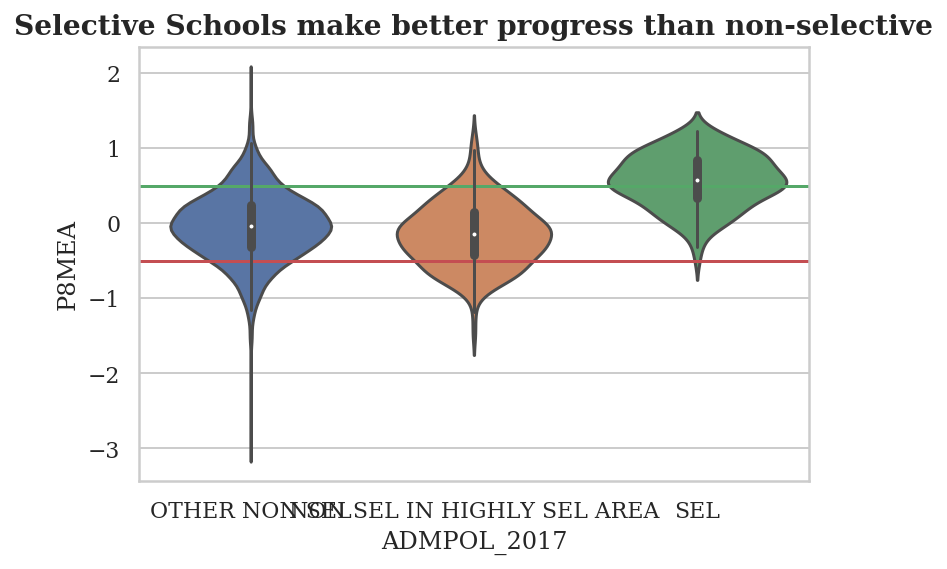

In [32]:
# Hypothesis: it is worth engineering a specific feature for identifying selective vs non-selective schools as
# it may be a significant factor in children's progression

# Violin plot shows this to be the case

sns.set(style="whitegrid", font='serif')

plt.axhline(y=0.5, color='g', linestyle='-')
plt.axhline(y=-0.5, color='r', linestyle='-')

ax = sns.violinplot(x=df_model_add_feat1c['ADMPOL_2017'], y=df_model_add_feat1c['P8MEA'], order=['OTHER NON SEL', 'NON SEL IN HIGHLY SEL AREA', 'SEL'], fontsize=8)

ax.set_title('Selective Schools make better progress than non-selective', fontsize=14, fontweight = 'bold')

plt.show()

In [33]:
# add a column that identifies whether a school is Selective (1) or not (0)

df_model_add_feat1c['RECTYPE'] = df_model_add_feat1c['ADMPOL_2017'].apply(lambda x: 1 if x == 'SEL' else 0)

In [34]:
df_model_add_feat1c['RECTYPE'].value_counts()

0    2905
1     162
Name: RECTYPE, dtype: int64

In [35]:
pd.set_option('display.max_rows',82)
df_model_add_feat1c.dtypes

RECTYPE                  int64
LEA_x                  float64
ESTAB_x                float64
URN                    float64
SCHNAME                 object
PCODE                   object
ICLOSE                 float64
NFTYPE                  object
RELDENOM                object
ADMPOL                  object
ADMPOL_2017             object
EGENDER                 object
FEEDER                 float64
TABKS2                 float64
TAB1618                float64
TPUP                   float64
PBPUP                  float64
KS2APS                 float64
PTPRIORLO              float64
PTPRIORAV              float64
PTPRIORHI              float64
PTFSM6CLA1A            float64
PTNOTFSM6CLA1A         float64
ATT8SCR                float64
ATT8SCRENG             float64
ATT8SCRMAT             float64
ATT8SCREBAC            float64
ATT8SCROPEN            float64
ATT8SCROPENG           float64
ATT8SCROPENNG          float64
AVGEBACFILL            float64
AVGOPENFILL            float64
P8PUP   

<a id='3'></a>

# <font color='blue'>3) Additional Features part 3: Most recent Ofsted Rating</font>

**Decision**: exclude from the master dataset as there are only 2,747 of 3,067 with Ofsted ratings attached

In [36]:
df_ofsted.head()

,URN,LA (code),LA (name),EstablishmentNumber,EstablishmentName,TypeOfEstablishment (code),TypeOfEstablishment (name),EstablishmentTypeGroup (code),EstablishmentTypeGroup (name),EstablishmentStatus (code),...,PreviousLA (code),PreviousLA (name),PreviousEstablishmentNumber,OfstedRating (name),RSCRegion (name),Country (name),UPRN,SiteName,MSOA (code),LSOA (code)
0,100000,201,City of London,3614.0,Sir John Cass's Foundation Primary School,2,Voluntary aided school,4,Local authority maintained schools,1,...,999,NaN,NaN,Outstanding,North-West London and South-Central England,NaN,2.000001e+11,NaN,E02000001,E01032739
1,100001,201,City of London,6005.0,City of London School for Girls,11,Other independent school,3,Independent schools,1,...,999,NaN,NaN,NaN,North-West London and South-Central England,NaN,2.000001e+11,NaN,E02000001,E01000002
2,100002,201,City of London,6006.0,St Paul's Cathedral School,11,Other independent school,3,Independent schools,1,...,999,NaN,NaN,NaN,North-West London and South-Central England,NaN,2.000001e+11,NaN,E02000001,E01032739
3,100003,201,City of London,6007.0,City of London School,11,Other independent school,3,Independent schools,1,...,999,NaN,NaN,NaN,North-West London and South-Central England,NaN,1.000229e+11,NaN,E02000001,E01032739
4,100004,202,Camden,1045.0,Sherborne Nursery School,15,Local authority nursery school,4,Local authority maintained schools,2,...,999,NaN,NaN,NaN,North-West London and South-Central England,NaN,2.001639e+08,NaN,E02000172,E01000901


In [37]:
df_ofsted2 = df_ofsted[['URN','OfstedRating (name)']]
df_ofsted2.columns = ['URN','Ofsted_rating_recent']
df_ofsted2.head()

,URN,Ofsted_rating_recent
0,100000,Outstanding
1,100001,NaN
2,100002,NaN
3,100003,NaN
4,100004,NaN


In [38]:
# MERGE WITH OVERALL MASTER DATASET

df_model_add_feat3 = pd.merge(df_model_add_feat1c, df_ofsted2, on='URN', how='left')
df_model_add_feat3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067 entries, 0 to 3066
Data columns (total 80 columns):
RECTYPE                 3067 non-null int64
LEA_x                   3067 non-null float64
ESTAB_x                 3067 non-null float64
URN                     3067 non-null float64
SCHNAME                 3067 non-null object
PCODE                   3067 non-null object
ICLOSE                  3067 non-null float64
NFTYPE                  3067 non-null object
RELDENOM                3067 non-null object
ADMPOL                  3067 non-null object
ADMPOL_2017             3067 non-null object
EGENDER                 3067 non-null object
FEEDER                  3067 non-null float64
TABKS2                  3067 non-null float64
TAB1618                 3067 non-null float64
TPUP                    3067 non-null float64
PBPUP                   3067 non-null float64
KS2APS                  3067 non-null float64
PTPRIORLO               3067 non-null float64
PTPRIORAV               3067

In [39]:
df_model_add_feat3_clean = df_model_add_feat3.dropna()

In [40]:
df_model_add_feat3_clean['Ofsted_rating_recent'].value_counts()

Good                    1641
Requires improvement     483
Outstanding              450
Special Measures         124
Serious Weaknesses        49
Name: Ofsted_rating_recent, dtype: int64

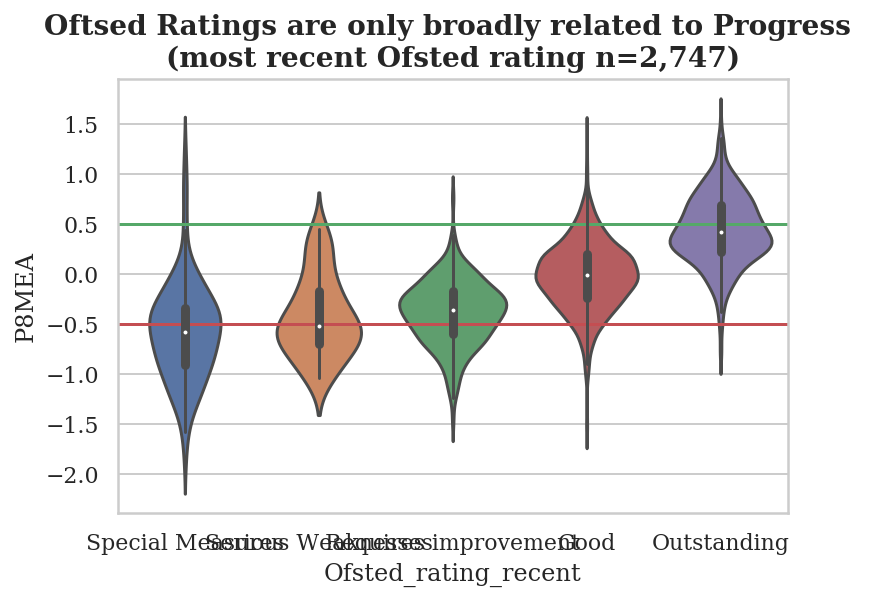

In [41]:
# Violin plot of Progress 8 measure vs GCSE%, coloured by Special School

sns.set(style="whitegrid", font='serif')

plt.axhline(y=0.5, color='g', linestyle='-')
plt.axhline(y=-0.5, color='r', linestyle='-')

ax = sns.violinplot(x=df_model_add_feat3_clean['Ofsted_rating_recent'], y=df_model_add_feat3_clean['P8MEA'], order=[ "Special Measures", "Serious Weaknesses", "Requires improvement","Good", "Outstanding"])

ax.set_title('Oftsed Ratings are only broadly related to Progress \n(most recent Ofsted rating n=2,747)', fontsize=14, fontweight = 'bold')

plt.show()

**DECISION**: exclude from the master dataset as there are only 2,747 of 3,067 with Ofsted ratings attached

<a id='4'></a>

# <font color='blue'>4) Remove academic features from the dataset</font>

In [42]:
df_model_add_feat_final = df_model_add_feat1c[[
'RECTYPE',
'LEA_x',
'ESTAB_x',
'URN',
'ICLOSE',
'NFTYPE',
'RELDENOM',
'ADMPOL_2017',
'EGENDER',
'FEEDER',
'TABKS2',
'TAB1618',
#'TOTPUPS',
'TPUP',
'PBPUP',
'PTFSM6CLA1A',
#'PTEALGRP2',
#'PTNMOB',
#'PSENSE4',
'P8MEA',
'PTEBACC_E_PTQ_EE',
#'PTEBACENG_E_PTQ_EE',
'PTEBACMAT_E_PTQ_EE',
'PTEBAC2SCI_E_PTQ_EE',
'PTEBACHUM_E_PTQ_EE',
'PTEBACLAN_E_PTQ_EE',
#'PTEBACC_EFSM6CLA1A_PTQ_EE',
#'PBEBACC_E_PTQ_EE',
#'PGEBACC_E_PTQ_EE',
#'PTEBACC_ENMOB_PTQ_EE',
'PTANYQ_PTQ_EE',
'PTmultiLan_E',
'PTtripleSci_E',
'TAVENT_E_3NG_PTQ_EE',
#'TAVENT_E_3NG_AV_PTQ_EE',
#'TAVENT_E_3NG_HI_PTQ_EE',
#'TAVENT_E_3NG_FSM6CLA1A_PTQ_EE',
#'TAVENT_E_3NG_NFSM6CLA1A_PTQ_EE',
'P8_BANDING',
'Teachers_FTE',
'TAs_FTE',
'Staff_non_classroom',
'Pupil_Teacher_ratio',
'Mean_Gross_FTE_Sal'
]]

<a id='5'></a>

# <font color='blue'>5) Rename feature / column names</font>

In [43]:
# Rename columns

df_model_add_feat_final.rename(columns={
'RECTYPE':'School_type',
'LEA_x':'Local_Ed_Auth',
'ESTAB_x':'Estab_group',
'URN':'School_ID',
'ICLOSE':'Is_Closed',
'NFTYPE':'School_type_2',
'RELDENOM':'Rel_Denom',
'ADMPOL_2017':'Selective_School',
'EGENDER':'School_gender',
'FEEDER':'School_feeder_sixth_form',
'TABKS2':'School_primary',
'TAB1618':'School_sixth_form',
#'TOTPUPS':'Num_pupils_school',
'TPUP':'Num_pupils_GCSEs',
'PBPUP':'Pct_Boys',
'PTFSM6CLA1A':'DISAD_pct_GCSEpup',
#'PTEALGRP2':'Pct_GCSEpup_Eng_addnl_lang',
'PTNMOB':'NONMOB_Pct_GCSEpup',
'PSENSE4':'Pct_GCSEpup_SEN',
'P8MEA':'Prog8_overall_measure',
'PTEBACC_E_PTQ_EE':'Num_GCSEpup_all_Ebacc',
#'PTEBACENG_E_PTQ_EE':'Pct_GCSEpup_enter_Ebacc_Eng',
'PTEBACMAT_E_PTQ_EE':'Pct_GCSEpup_enter_Ebacc_Maths',
'PTEBAC2SCI_E_PTQ_EE':'Pct_GCSEpup_enter_Ebacc_Science',
'PTEBACHUM_E_PTQ_EE':'Pct_GCSEpup_enter_Ebacc_Humanities',
'PTEBACLAN_E_PTQ_EE':'Pct_GCSEpup_enter_Ebacc_Lang',
#'PTEBACC_EFSM6CLA1A_PTQ_EE':'DISAD_Pct_GCSEpup_all_Ebacc',
#'PBEBACC_E_PTQ_EE':'Pct_GCSEpup_boys_all_Ebacc',
#'PGEBACC_E_PTQ_EE':'Pct_GCSEpup_girls_all_Ebacc',
#'PTEBACC_ENMOB_PTQ_EE':'NONMOB_pct_GCSEpup_all_Ebacc',
'PTANYQ_PTQ_EE':'Pct_GCSEpup_any_qual',
'PTmultiLan_E':'Pct_GCSEpup_more_onelang',
'PTtripleSci_E':'Pct_GCSEpup_3_sciences',
'TAVENT_E_3NG_PTQ_EE':'Avg_num_GCSEs_equiv_pup',
#'TAVENT_E_3NG_AV_PTQ_EE':'MID_Avg_num_GCSEs_equiv_pup',
#'TAVENT_E_3NG_HI_PTQ_EE':'HI_Avg_num_GCSEs_equiv_pup',
#'TAVENT_E_3NG_FSM6CLA1A_PTQ_EE':'DISAD_Avg_num_GCSEs_equiv_pup',
#'TAVENT_E_3NG_NFSM6CLA1A_PTQ_EE':'AD_Avg_num_GCSEs_equiv_pup',
'P8_BANDING':'Prog8_band'
},
inplace=True)

/Users/jacktyler-whittle/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [44]:
df_model_add_feat_final.head(3)

,School_type,Local_Ed_Auth,Estab_group,School_ID,Is_Closed,School_type_2,Rel_Denom,Selective_School,School_gender,School_feeder_sixth_form,...,Pct_GCSEpup_any_qual,Pct_GCSEpup_more_onelang,Pct_GCSEpup_3_sciences,Avg_num_GCSEs_equiv_pup,Prog8_band,Teachers_FTE,TAs_FTE,Staff_non_classroom,Pupil_Teacher_ratio,Mean_Gross_FTE_Sal
0,0,202.0,4104.0,100049.0,0.0,CY,Does not apply,OTHER NON SEL,MIXED,0.0,...,99.0,5.0,17.0,7.3,3.0,81.1,22.0,23.0,13.0,43950.0
1,0,202.0,4166.0,100050.0,0.0,CY,Does not apply,OTHER NON SEL,GIRLS,1.0,...,100.0,8.0,33.0,8.5,1.0,83.5,7.7,25.0,13.4,44418.0
2,0,202.0,4196.0,100051.0,0.0,CY,Does not apply,OTHER NON SEL,MIXED,0.0,...,99.0,2.0,20.0,7.8,4.0,63.0,12.0,29.3,14.8,43044.0


<a id='6'></a>

# <font color='blue'>6) Export final (base + new features) dataset ready for modeling</font>

In [45]:
# EXPORT FILE TO CSV

df_model_add_feat_final.to_csv('data_files/final_full_feat_gcse_2018.csv')

END